In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# from subprocess import check_output
# print(check_output(["ls","./*"])).decode("utf8")

In [9]:
poverty_level_data = pd.read_csv('./PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
house_income_data = pd.read_csv('./MedianHouseholdIncome2015.csv', encoding = "windows-1252")
highSchool_complete_data = pd.read_csv('./PercentOver25CompletedHighSchool.csv', encoding = "windows-1252")
share_race_data = pd.read_csv('./ShareRaceByCity.csv', encoding = "windows-1252")
kill_data = pd.read_csv('./PoliceKillingsUS.csv', encoding = "windows-1252")

In [10]:
poverty_level_data.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [11]:
poverty_level_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [12]:
poverty_level_data['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

##### BAR PLOT

Text(0.5, 1.0, 'Poverty Rate Given States')

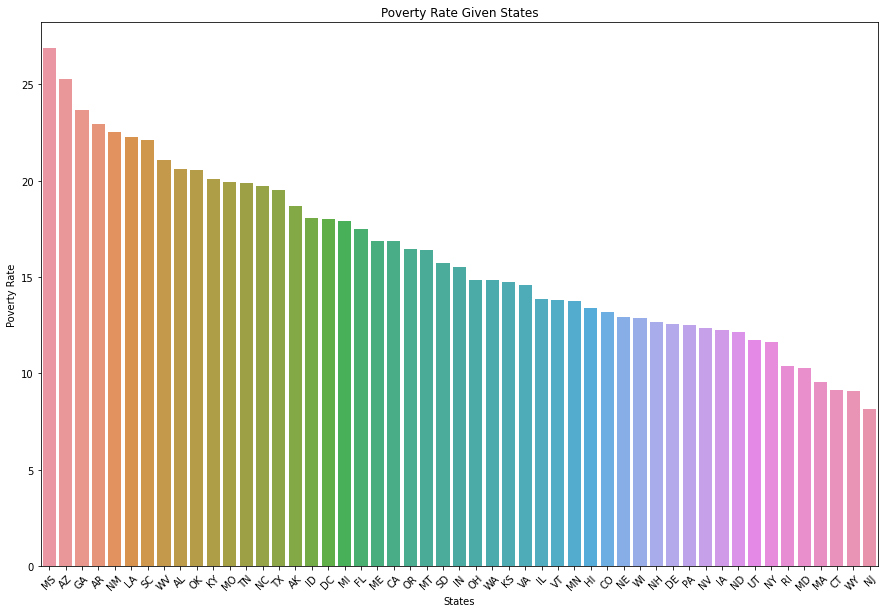

In [15]:
# poverty rate of each state
poverty_level_data.poverty_rate.replace(['-'], 0.0, inplace = True)   # replace(oldValue, newValue, ..)
poverty_level_data.poverty_rate = poverty_level_data.poverty_rate.astype('float')
area_list = list(poverty_level_data['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = poverty_level_data.poverty_rate[poverty_level_data['Geographic Area'] == i]
    area_poverty_rate = sum(x)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio': area_poverty_ratio})
new_index = data['area_poverty_ratio'].sort_values(ascending = False).index.values
sorted_data = data.reindex(new_index)      #  SORTING a DataFrame example !!!

# visualization
plt.figure(figsize=(15, 10))
sns.barplot(x = sorted_data['area_list'] , y = sorted_data['area_poverty_ratio'])
plt.xticks(rotation = 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')